# 1)Citire si preprocesare

In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from itertools import combinations
from lab_utils_multi import  load_house_data, run_gradient_descent 
from lab_utils_multi import  norm_plot, plt_equal_scale
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

In [2]:
data = pd.read_csv('insurance.csv')
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
cat_cols = ['sex','smoker','region']
print(data[cat_cols].head())

      sex smoker     region
0  female    yes  southwest
1    male     no  southeast
2    male     no  southeast
3    male     no  northwest
4    male     no  northwest


In [4]:
data[cat_cols] = data[cat_cols].apply(lambda x: x.astype('category').cat.codes)
print(data.head())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


# 2) Feature vs prediction plot

In [5]:
x_names = data.columns.tolist()[:-1]
y_name = data.columns.tolist()[-1]
print(x_names)
y_name

['age', 'sex', 'bmi', 'children', 'smoker', 'region']


'charges'

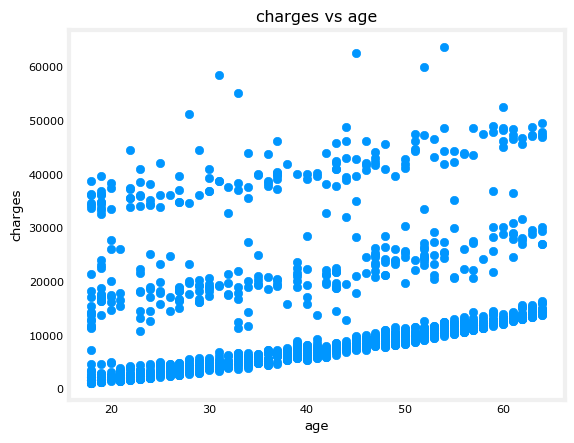

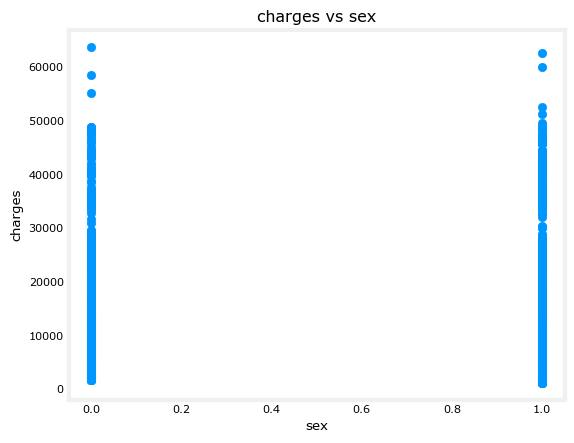

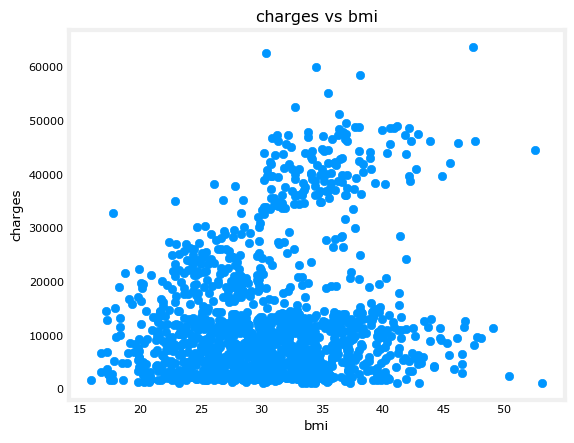

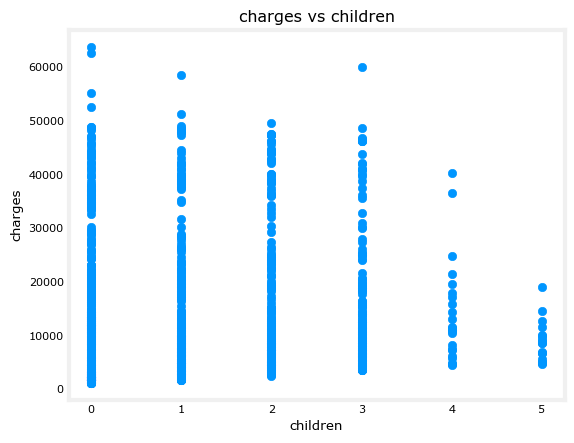

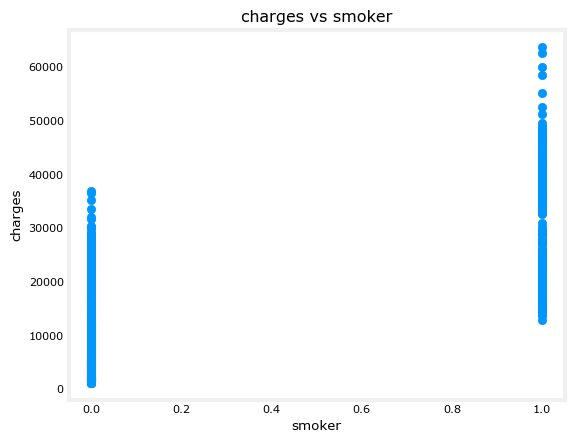

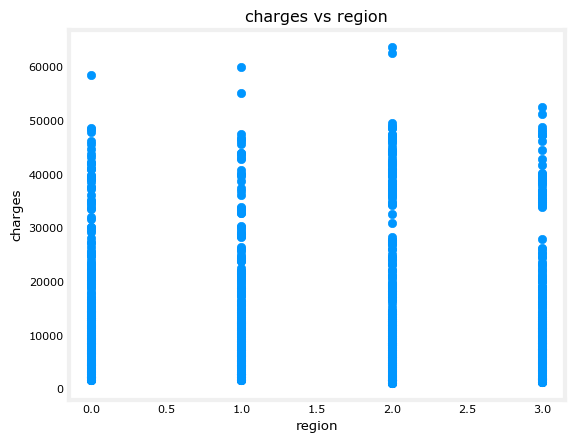

In [6]:
for x_name in x_names:
    plt.scatter(data[x_name],data[y_name])
    plt.title(f'{y_name} vs {x_name}')
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()

# 3) Impartire seturi de date

In [7]:
features = data[x_names]
target = data[y_name]

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

print(features_train.head())
print(target_train.head())
print(features_test.head())
print(target_test.head())

      age  sex    bmi  children  smoker  region
560    46    0  19.95         2       0       1
1285   47    0  24.32         0       0       0
1142   52    0  24.86         0       0       2
969    39    0  34.32         5       0       2
486    54    0  21.47         3       0       1
560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
Name: charges, dtype: float64
      age  sex     bmi  children  smoker  region
764    45    0  25.175         2       0       0
887    36    0  30.020         0       0       1
890    64    0  26.885         0       1       1
1293   46    1  25.745         3       0       1
259    19    1  31.920         0       1       1
764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
Name: charges, dtype: float64


In [8]:
features_train = features_train.reset_index(drop=True)
target_train = target_train.reset_index(drop=True)
features_test = features_test.reset_index(drop=True)
target_test = target_test.reset_index(drop=True)

print(features_train.head())
print(target_train.head())
print(features_test.head())
print(target_test.head())

   age  sex    bmi  children  smoker  region
0   46    0  19.95         2       0       1
1   47    0  24.32         0       0       0
2   52    0  24.86         0       0       2
3   39    0  34.32         5       0       2
4   54    0  21.47         3       0       1
0     9193.83850
1     8534.67180
2    27117.99378
3     8596.82780
4    12475.35130
Name: charges, dtype: float64
   age  sex     bmi  children  smoker  region
0   45    0  25.175         2       0       0
1   36    0  30.020         0       0       1
2   64    0  26.885         0       1       1
3   46    1  25.745         3       0       1
4   19    1  31.920         0       1       1
0     9095.06825
1     5272.17580
2    29330.98315
3     9301.89355
4    33750.29180
Name: charges, dtype: float64


# 4) Multiple linear regression gradient descent

In [9]:
features_train_np = features_train.to_numpy()
features_test_np = features_test.to_numpy()
target_train_np = target_train.to_numpy()
target_test_np = target_test.to_numpy()

features_np = features.to_numpy()
target_np = target.to_numpy()

initial_w = np.zeros(features_train.shape[1])
initial_b = 0

In [10]:
def compute_cost(X_in,y_in,w_in,b_in):
    m = X_in.shape[0]
    return 1/(2*m) * np.sum((np.dot(X_in,w_in) + b_in - y_in) **2)

In [11]:
cost = compute_cost(features_train, target_train, initial_w, initial_b)
print(f'Cost at initial w : {cost}')

Cost at initial w : 161225866.59212065


In [12]:
def compute_gradient(X_in, y_in, w_in, b_in):
    m, n = X_in.shape
    errs = np.dot(X_in,w_in) + b_in - y_in
    dc_dw = 1/m * np.array([np.dot(errs, X_in[:,j]) for j in range(n)])
    dc_db = 1/m * np.sum(errs)
    return dc_dw, dc_db

In [13]:
tmp_dj_dw, tmp_dj_db = compute_gradient(features_train_np, target_train_np, initial_w, initial_b)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -13346.089736364487
dj_dw at initial w,b: 
 [-572874.13   -7176.3  -422181.18  -15830.14   -6531.53  -20129.79]


In [14]:
def gradient_descent(X_in,y_in,w_in,b_in,cost_function,gradient_function, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = copy.deepcopy(b_in)

    for i in range(num_iters):
        dc_dw, dc_db = gradient_function(X_in, y_in, w, b)

        w -= alpha * dc_dw
        b -= alpha * dc_db

        J_history.append(cost_function(X_in,y_in,w,b))

    return w,b,J_history

In [15]:
# some gradient descent settings
iterations = 200
alpha = 5.0e-4
# run gradient descent 
final_w, final_b, hist = gradient_descent(features_train_np, target_train_np, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {final_b:0.2f},{[(x_names[i],final_w[i]) for i in range(len(final_w))]} ")

b,w found by gradient descent: -12.21,[('age', 195.22023218445483), ('sex', 27.47253367246939), ('bmi', 188.34192512153032), ('children', 65.98033878146401), ('smoker', 379.0737936387633), ('region', -42.602096065582515)] 


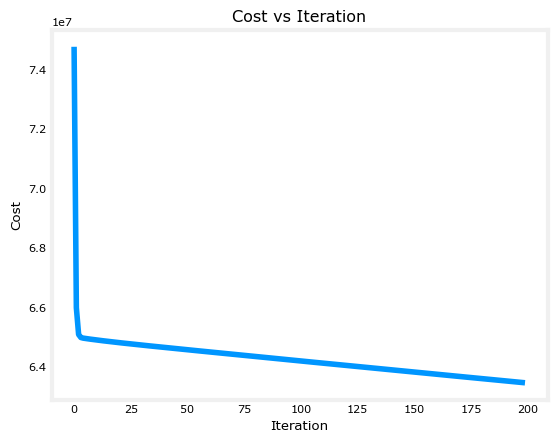

In [16]:
plt.plot(range(iterations),hist)
plt.title('Cost vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

# 5) R2

In [17]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y-y.mean())**2)

    score = 1 - num / denom
    return score

In [18]:
target_predicted_train = np.dot(features_train, final_w) + final_b
print(r2_score(target_train, target_predicted_train))
target_predicted_validate = np.dot(features_test, final_w) + final_b
print(r2_score(target_test,target_predicted_validate))

0.12064276857070388
0.15714787469016755


<Axes: ylabel='Feature'>

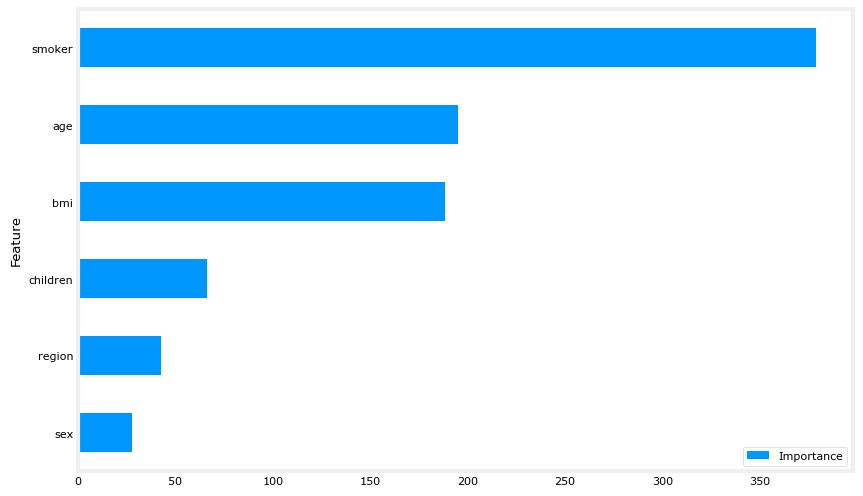

In [19]:
coefficients = copy.deepcopy(final_w)
feature_importance = pd.DataFrame({'Feature': features.columns.values, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

# 6) Normalization

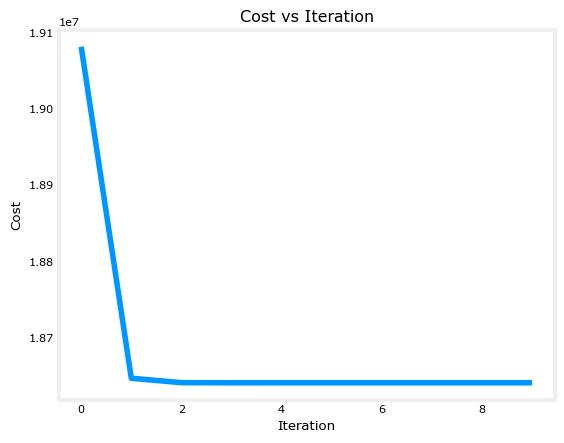

In [20]:
mu     = np.mean(features_train_np,axis=0)   
sigma  = np.std(features_train_np,axis=0) 

features_train_norm_np = (features_train_np - mu)/sigma 
features_test_norm_np = (features_test_np - mu)/sigma


iterations_norm = 10
alpha_norm = 1

final_w_norm, final_b_norm, hist_norm = gradient_descent(features_train_norm_np, target_train_np,
                                            initial_w, initial_b,
                                           compute_cost, compute_gradient,
                                           alpha_norm, iterations_norm)

plt.plot(range(iterations_norm),hist_norm)
plt.title('Cost vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

In [21]:
target_predicted_train_norm = np.dot(features_train_norm_np, final_w_norm) + final_b_norm
print(r2_score(target_train_np, target_predicted_train_norm))
target_predicted_test_norm = np.dot(features_test_norm_np, final_w_norm) + final_b_norm
print(r2_score(target_test_np, target_predicted_test_norm))

0.741704928323397
0.7833463125891506


# 7) Feature importance

<Axes: ylabel='Feature'>

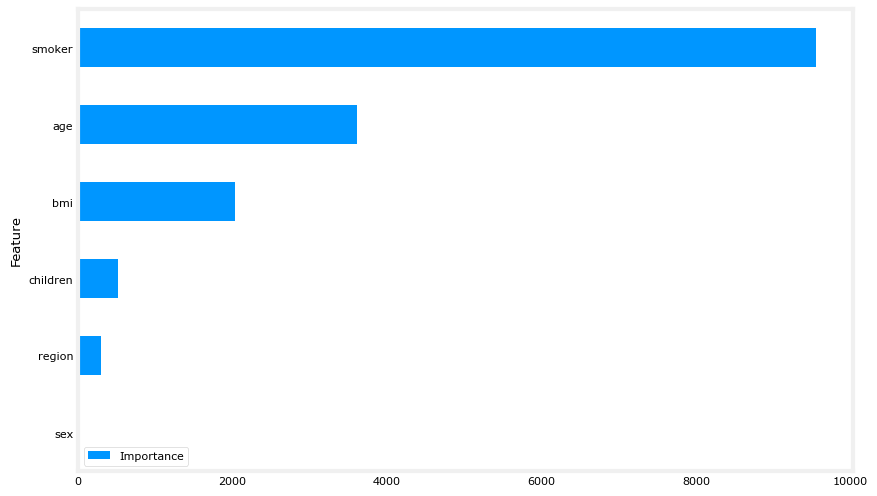

In [22]:
coefficients_norm = copy.deepcopy(final_w_norm)
feature_importance = pd.DataFrame({'Feature': features.columns.values, 'Importance': np.abs(coefficients_norm)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [23]:
print(f"b,w found by gradient descent with normalization: {final_b_norm:0.2f},{[(x_names[i],final_w_norm[i]) for i in range(len(final_w_norm))]} ")

b,w found by gradient descent with normalization: 13346.09,[('age', 3616.1084492645896), ('sex', -9.392942943045952), ('bmi', 2028.308423670796), ('children', 516.6625545663919), ('smoker', 9557.143426750676), ('region', -302.3882202783492)] 


# 8) Polynomial regression

In [24]:
rows_norm, cols_norm = features_train_norm_np.shape
print(f"rows = {rows_norm}, cols = {cols_norm}")

rows = 1070, cols = 6


In [25]:
size_target_train = len(target_train_np)
print(size_target_train)

1070


## Plotting possible useful feature relationships

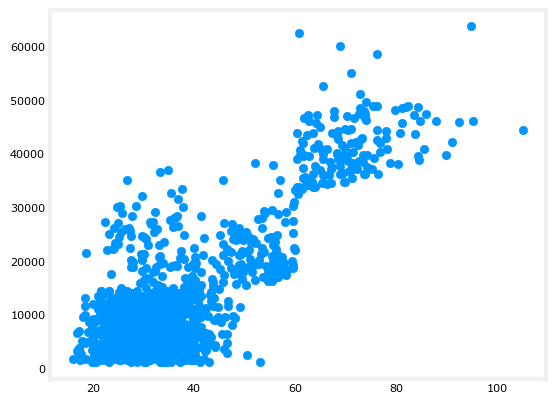

In [26]:
plt.scatter((data["smoker"] + 1) * data["bmi"],data["charges"])
plt.show()

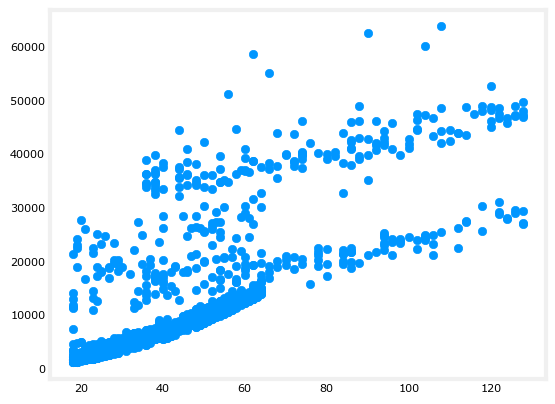

In [27]:
plt.scatter((data["smoker"] + 1) * data["age"],data["charges"])
plt.show()

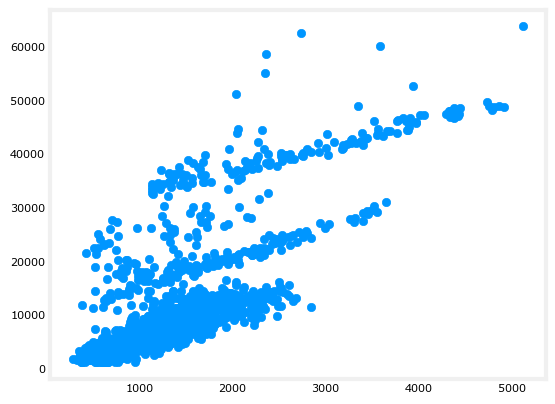

In [28]:
plt.scatter((data["smoker"] + 1) * data["age"] * data["bmi"],data["charges"])
plt.show()

In [29]:
features_data = data.iloc[:,:-1]
print(features_data.head())

   age  sex     bmi  children  smoker  region
0   19    0  27.900         0       1       3
1   18    1  33.770         1       0       2
2   28    1  33.000         3       0       2
3   33    1  22.705         0       0       1
4   32    1  28.880         0       0       1


In [30]:
target_data = data.iloc[:,-1]
print(target_data.head())

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


## Feature engineering

In [31]:
features_data["smoker_bmi"] = (data["smoker"] + 1) * data["bmi"]
features_data["smoker_age"] = (data["smoker"] + 1) * data["age"]
features_data["smoker_age_bmi"] = (data["smoker"] + 1) * data["age"] * data["bmi"]

print(features_data.head())

   age  sex     bmi  children  smoker  region  smoker_bmi  smoker_age  \
0   19    0  27.900         0       1       3      55.800          38   
1   18    1  33.770         1       0       2      33.770          18   
2   28    1  33.000         3       0       2      33.000          28   
3   33    1  22.705         0       0       1      22.705          33   
4   32    1  28.880         0       0       1      28.880          32   

   smoker_age_bmi  
0        1060.200  
1         607.860  
2         924.000  
3         749.265  
4         924.160  


## Train, test

In [32]:
features_poly_train, features_poly_test, target_poly_train, target_poly_test = train_test_split(features_data, target_data, test_size = 0.2, random_state = 42)

In [33]:
features_poly_train_np = features_poly_train.to_numpy()
features_poly_test_np = features_poly_test.to_numpy()
target_poly_train_np = target_poly_train.to_numpy()
target_poly_test_np = target_poly_test.to_numpy()

In [34]:
initial_w_poly = np.zeros(features_poly_train.shape[1])
initial_b_poly = 0

## Normalization

In [35]:
mu_poly     = np.mean(features_poly_train_np,axis=0)   
sigma_poly  = np.std(features_poly_train_np,axis=0) 

features_train_poly_norm_np = (features_poly_train_np - mu_poly)/sigma_poly 
features_test_poly_norm_np = (features_poly_test_np - mu_poly)/sigma_poly


## Applying gradient descent

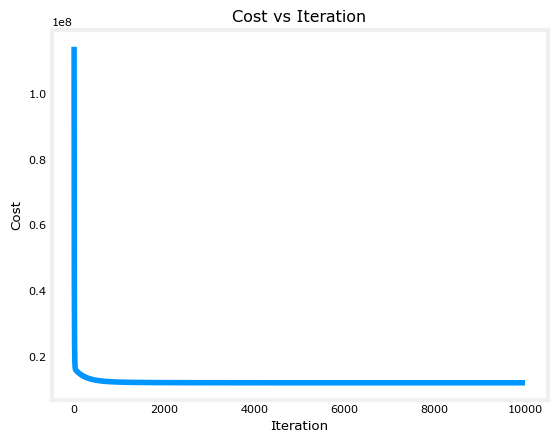

In [36]:
iterations_poly_norm = 10000
alpha_poly_norm = 1e-1

final_w_poly_norm, final_b_poly_norm, hist_poly_norm = gradient_descent(features_train_poly_norm_np, target_poly_train_np,
                                            initial_w_poly, initial_b_poly,
                                           compute_cost, compute_gradient,
                                           alpha_poly_norm, iterations_poly_norm)

plt.plot(range(iterations_poly_norm),hist_poly_norm)
plt.title('Cost vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

In [37]:
cost_final_train = compute_cost(features_train_poly_norm_np, target_poly_train_np, final_w_poly_norm, final_b_poly_norm)
print(f'Cost_train for poly: {cost_final_train}')

Cost_train for poly: 11964049.804976773


In [38]:
cost_final_test = compute_cost(features_test_poly_norm_np, target_poly_test_np, final_w_poly_norm, final_b_poly_norm)
print(f'Cost_test for poly: {cost_final_test}')

Cost_test for poly: 10414273.269010743


# Final r2 scores with polynomial regression

In [39]:
target_predicted_train_poly_norm = np.dot(features_train_poly_norm_np, final_w_poly_norm) + final_b_poly_norm
print(r2_score(target_poly_train_np, target_predicted_train_poly_norm))
target_predicted_test_poly_norm = np.dot(features_test_poly_norm_np, final_w_poly_norm) + final_b_poly_norm
print(r2_score(target_poly_test_np, target_predicted_test_poly_norm))

0.8342167314207876
0.8658375734353412


# 9) Poly feature importance

<Axes: ylabel='Feature'>

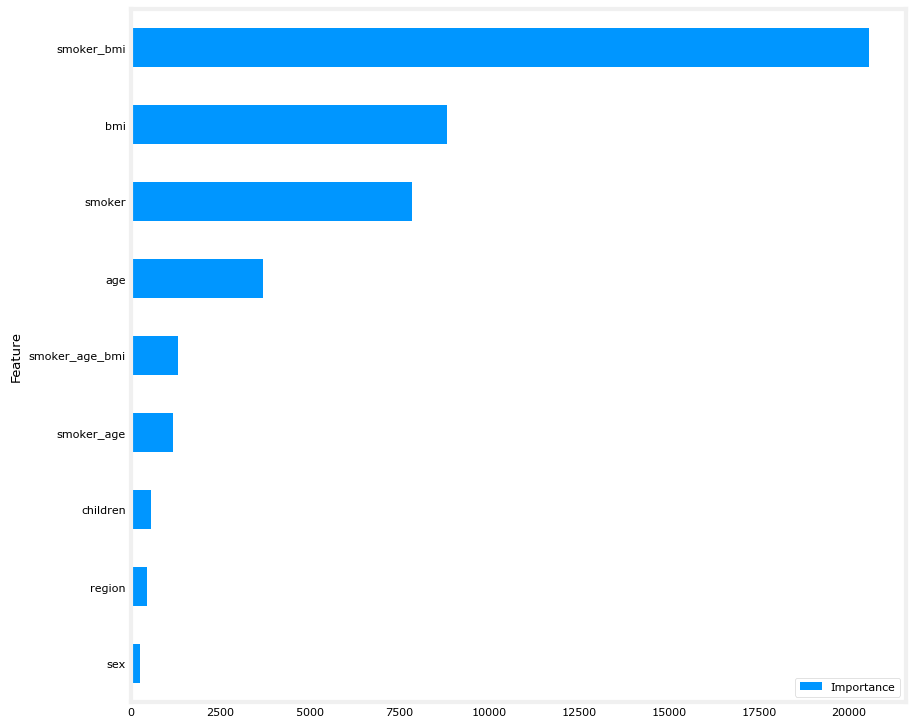

In [40]:
coefficients_poly_norm = copy.deepcopy(final_w_poly_norm)
feature_importance = pd.DataFrame({'Feature': features_data.columns.values, 'Importance': np.abs(coefficients_poly_norm)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 9))

# 10

In [41]:
new_features_data = pd.DataFrame()

new_features_data["smoker_bmi"] = features_data["smoker_bmi"]
new_features_data["bmi"] = features_data["bmi"]
new_features_data["smoker"] = features_data["smoker"]
new_features_data["age"] = features_data["age"]

new_target_data = target_data

In [42]:
f_train, f_test, t_train, t_test = train_test_split(new_features_data, new_target_data, test_size = 0.2, random_state = 42)

In [43]:
f_train_np = f_train.to_numpy()
f_test_np = f_test.to_numpy()
t_train_np = t_train.to_numpy()
t_test_np = t_test.to_numpy()

In [44]:
i_w = np.zeros(f_train.shape[1])
i_b = 0

In [45]:
mu_f     = np.mean(f_train_np,axis=0)   
sigma_f  = np.std(f_train_np,axis=0) 

f_train_norm_np = (f_train_np - mu_f)/sigma_f 
f_test_norm_np = (f_test_np - mu_f)/sigma_f

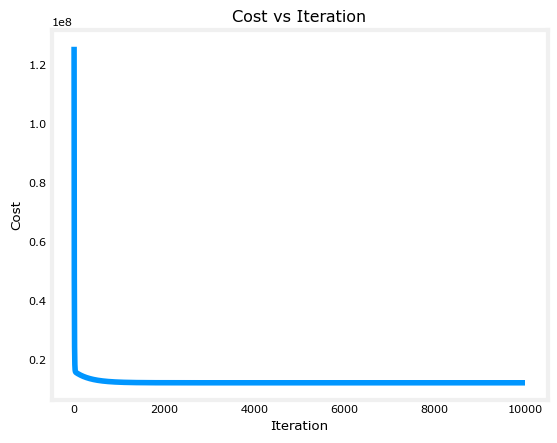

In [46]:
iterations_f = 10000
alpha_f = 1e-1

final_w_, final_b_, hist_f = gradient_descent(f_train_norm_np, t_train_np,
                                            i_w, i_b,
                                           compute_cost, compute_gradient,
                                           alpha_f, iterations_f)

plt.plot(range(iterations_f),hist_f)
plt.title('Cost vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

<Axes: ylabel='Feature'>

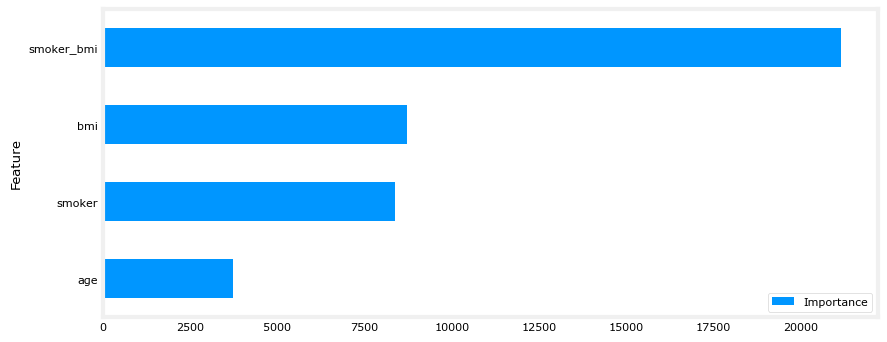

In [47]:
coefficients_poly_norm = copy.deepcopy(final_w_)
feature_importance = pd.DataFrame({'Feature': new_features_data.columns.values, 'Importance': np.abs(coefficients_poly_norm)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 4))